In [1]:
import seaborn as sns
import pandas as pd

## Basic information about our dataset

In [2]:
df = pd.read_csv('./data/amazon_prime_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [3]:
df.shape

(9668, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [5]:
# country_grp = df.groupby('country').size().reset_index()
# print ((country_grp))
# sns.set(rc = {'figure.figsize':(10,40)})
# ax = sns.barplot(x = country_grp[0], y = country_grp.country)
# ax.set(xlabel="Number of movies/ TV shows in total", ylabel="country")

[Text(0.5, 0, 'Either movie or TV show'),
 Text(0, 0.5, 'Number of movies or TV shows')]

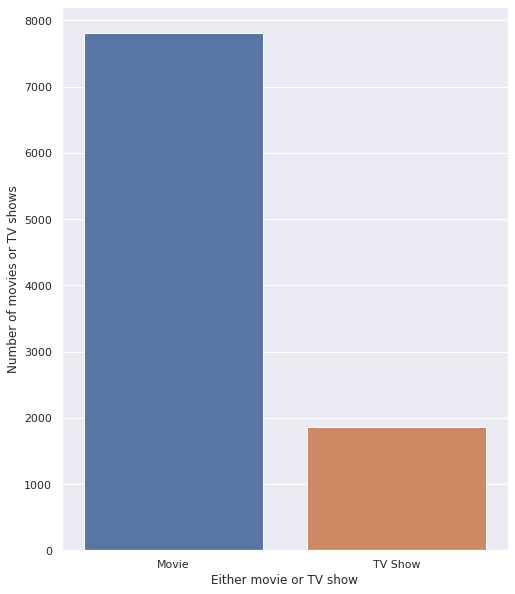

In [6]:
showtype = df['type'].value_counts().reset_index()
sns.set(rc = {'figure.figsize':(8,10)})
showtype.set_index('index', inplace=True)
ax = sns.barplot(x = showtype.index, y = showtype.type)
ax.set(xlabel = "Either movie or TV show", ylabel = "Number of movies or TV shows")

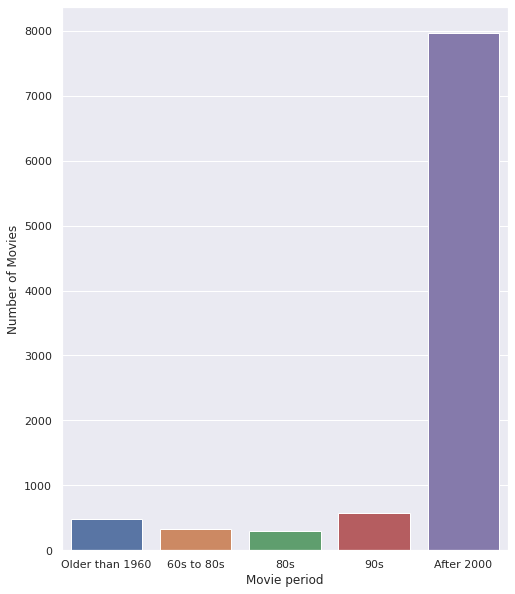

In [15]:
modern_movies = 0
movies_90s = 0
movies_80s = 0
old_movies = 0
very_old_movies = 0

for year in df['release_year']:
    if (year >= 2000):
        modern_movies += 1
    elif (year >= 1990):
        movies_90s += 1
    elif (year >= 1980):
        movies_80s += 1
    elif (year >= 1960):
        old_movies += 1
    else:
        very_old_movies += 1
# print("Modern movies: ", modern_movies)
# print("Old movies: ", old_movies)
# print("Very old movies: ", very_old_movies)
data = [['Older than 1960', very_old_movies],
['60s to 80s', old_movies],
['80s', movies_80s],
['90s', movies_90s],
['After 2000', modern_movies]
]
mdf = pd.DataFrame(data, columns=['Movie period', 'Number of Movies'])

ax = sns.barplot(x = mdf['Movie period'], y = mdf['Number of Movies'])
